# Case Study: Analysing Fuel Economy ⛽️

## Introduction

What comes to your mind when you think of "Fuel Economy"?

Let's look at the definition of economy. One of the definition of economy is the _consumption of goods and services_. When you put economy together with fuel, you get the _consumption of fuel by cars_. 

In essense, fuel economy refers to the _**number of miles a car can travel using a specific amount of fuel**_. 

Excerpt from Wikipedia [page](https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles) on Fuel Economy in Automobiles:

> The fuel economy of an automobile is the fuel efficiency relationship between the distance traveled and the amount of fuel consumed by the vehicle. Consumption can be expressed in terms of volume of fuel to travel a distance, or the distance travelled per unit volume of fuel consumed.

In this case study, we are analyzing [fuel economy data](https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy) provided by the EDA, or the United States Environmental Protection Agency.

***

## Fuel Economy Data

### How are Vehicles Tested?

According to [EDA](https://www.fueleconomy.gov/feg/how_tested.shtml), 

> Fuel economy is measured under controlled conditions in a laboratory using a series of tests specified by federal law. Manufacturers test their own vehicles—usually pre-production prototypes—and report the results to EPA. EPA reviews the results and confirms about 15%–20% of them through their own tests at the National Vehicles and Fuel Emissions Laboratory.

The dataset has been uploaded [here](https://github.com/katiehuangx/Udacity-Data-Analyst-Nanodegree/tree/main/Part%202:%20Intro%20to%20Data%20Analysis/Case%20Study%20%232:%20Fuel%20Economy/Data%20Set). We are only looking at dataset from year 2008 and 2018.

Here is the summarised information of the dataset:
- Model – Vehicle make and model 
- Displ – Engine displacement - the size of an engine in liters 
- Cyl – The number of cylinders in a particular engine
- Trans – Transmission type and number of gears
- Drive – Drive axle type (2WD = 2-wheel drive, 4WD = 4-wheel/all-wheel drive) 
- Fuel – Fuel type i.e. gasoline, diesel, ethanol, etc
- Cert Region - Certification Region Code i.e. CA - California
- Veh Class – EPA vehicle class. See [here](http://www.fueleconomy.gov/feg/findacarhelp.shtml#epaSizeClass)
- Air Pollution Score - Also known as Smog Rating) – see [here](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore) and [here](https://www.epa.gov/greenvehicles/smog-rating)
- City MPG – Estimated city mpg (miles/gallon)
- Hwy MPG – Estimated highway mpg (miles/gallon)
- Cmb MPG – Estimated combined mpg (miles/gallon)
- Greenhouse Gas Score (Greenhouse Gas Rating) – see [here](https://www.epa.gov/greenvehicles/greenhouse-gas-rating)
- SmartWay – Yes, No, or Elite. See [here](https://www.epa.gov/greenvehicles/consider-smartway-vehicle)

The complete guide is uploaded [here](https://github.com/katiehuangx/Udacity-Data-Analyst-Nanodegree/blob/main/Part%202:%20Intro%20to%20Data%20Analysis/Case%20Study%20%232:%20Fuel%20Economy/GreenVehicleGuideDocumentation.pdf).

***

## Asking Questions

Based on an initial study of the dataset, we have come up with several questions that we would like the answer to and, which our analysis would be based on.

The questions are
- Are **more models using alternative sources** of fuel? By how much?
- How much have **vehicle classes improved in fuel economy**?
- What are the **characteristics of SmartWay** vehicles?
- What features are associated with **better fuel economy**?
- For all the models that were produced in 2008 that are still produced in 2018, how much has the **mpg (miles/gallon) improved** and which vehicle improved the most?

***

## Assessing Data

We import the required libraries and load the 2008 and 2018 dataset.

- Numpy - Data arrays
- Pandas - Data manipulation
- Matplotlib & Seaborn - Data visualisation

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load csv
df_08 = pd.read_csv('/Users/katiehuang/Documents/Data Analytics/Udacity Data Analyst Nanodegree/Course 2 - Intro to Data Analysis/Case Study 2 - Fuel Economy/fuel_economy_datasets/df_08.csv')
df_18 = pd.read_csv('/Users/katiehuang/Documents/Data Analytics/Udacity Data Analyst Nanodegree/Course 2 - Intro to Data Analysis/Case Study 2 - Fuel Economy/fuel_economy_datasets/df_18.csv')

Let's have a look at the data sets using `df.head()`.

In [2]:
# Preview data set for 2008
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [3]:
# Preview data set for 2018
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


We will run a few queries to get these information from our data set.
- How many **samples (rows/observations) and columns** does our data sets have?
- Are there any **duplicated rows** and if yes, how many?
- What are the **data types**?
- Is there any **missing values** and if yes, how many?
- What are the **unique values** and what is the count?

In [4]:
# number of samples and columns in each dataset
df_08.shape, df_18.shape

((2404, 18), (1611, 18))

In [5]:
# duplicate rows in each dataset
df_08.duplicated().sum(), df_18.duplicated().sum()

(25, 0)

In [6]:
# datatypes of columns
df_08.info(), df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

(None, None)

From `df.info()`, we can see that some features have missing values, hence we will run `df.isnull().sum()` to find out which feature has missing values and how many are there.

In [7]:
# features with missing values
df_08.isnull().sum(), df_18.isnull().sum()

(Model                     0
 Displ                     0
 Cyl                     199
 Trans                   199
 Drive                    93
 Fuel                      0
 Sales Area                0
 Stnd                      0
 Underhood ID              0
 Veh Class                 0
 Air Pollution Score       0
 FE Calc Appr            199
 City MPG                199
 Hwy MPG                 199
 Cmb MPG                 199
 Unadj Cmb MPG           199
 Greenhouse Gas Score    199
 SmartWay                  0
 dtype: int64,
 Model                   0
 Displ                   2
 Cyl                     2
 Trans                   0
 Drive                   0
 Fuel                    0
 Cert Region             0
 Stnd                    0
 Stnd Description        0
 Underhood ID            0
 Veh Class               0
 Air Pollution Score     0
 City MPG                0
 Hwy MPG                 0
 Cmb MPG                 0
 Greenhouse Gas Score    0
 SmartWay                0
 Com

Some of the features in 2008 have 199 null values.

In [8]:
# number of non-null unique values for features in each dataset
df_08.nunique(), df_18.nunique()

(Model                   436
 Displ                    47
 Cyl                       8
 Trans                    14
 Drive                     2
 Fuel                      5
 Sales Area                3
 Stnd                     12
 Underhood ID            343
 Veh Class                 9
 Air Pollution Score      13
 FE Calc Appr              2
 City MPG                 39
 Hwy MPG                  43
 Cmb MPG                  38
 Unadj Cmb MPG           721
 Greenhouse Gas Score     20
 SmartWay                  2
 dtype: int64,
 Model                   367
 Displ                    36
 Cyl                       7
 Trans                    26
 Drive                     2
 Fuel                      5
 Cert Region               2
 Stnd                     19
 Stnd Description         19
 Underhood ID            230
 Veh Class                 9
 Air Pollution Score       6
 City MPG                 58
 Hwy MPG                  62
 Cmb MPG                  57
 Greenhouse Gas Score     10

`df.nunique()` gave us some pretty interesting insights. There's 5 unique fuel types - we'll run `.unique()` to see what they are!

In [9]:
df_08['Fuel'].unique(), df_18['Fuel'].unique()

(array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
       dtype=object),
 array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
        'Electricity'], dtype=object))

***

## Cleaning Column Labels

Firstly, before we begin with transforming the data, we will drop the columns that are not consistent (not present in both data sets) or are not relevant to our questions.

We use the pandas [`df.drop()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) function.

### Drop Extraneous Columns

In [10]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [11]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

# confirm changes
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


### Rename Columns

We change the `Sales Area` column in the 2008 dataset to `Cert Region` for consistency.

Then, rename all column names to replace spaces with underscores `_` and convert everything to `lowercase`. 

Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use `df.column_name` instead of `df['column_name']` to select columns or use `query()`. Being consistent with lowercase and underscores also helps make column names easy to remember.

In [12]:
# rename Sales Area to Cert Region
df_08.rename(columns={'Sales Area':'Cert Region'}, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [13]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [14]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [15]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [16]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()

True

We confirmed that the column names in both 2008 and 2018 datasets are the same.

***

## Filter, Drop Nulls, Dedupe

**1. Filter**

For consistency, we would only compare cars certified by California standards. Filter both datasets using `df.query()` to select only rows where `cert_region` is CA. Then, drop the `cert_region` columns, since it will no longer provide any useful information (we'll know every value is 'CA').

**2. Drop Nulls**

Drop any rows in both datasets that contain missing values.

**3. Dedupe**

Drop any duplicate rows in both datasets.


### 1. Filter by Certification Region

Use `df.query()` to filter `CA` values in `cert_region` column. Then, running `df.unique()` to confirm that the updated datasets have `CA` values only.

In [17]:
# filter datasets for rows following California standards
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [18]:
# confirm only certification region is California
df_08['cert_region'].unique(), df_18['cert_region'].unique()

(array(['CA'], dtype=object), array(['CA'], dtype=object))

Use `df.drop()` and setting `axis=1` to refer to columns and `inplace=True` to reflect the removal of selected values from the existing datasets.

In [19]:
# drop certification region columns form both datasets
df_08.drop('cert_region', axis=1, inplace=True)
df_18.drop('cert_region', axis=1, inplace=True)

In [20]:
df_08.shape, df_18.shape

((1084, 13), (798, 13))

### 2. Drop Rows with Missing Values

Use `df.isnull().sum()` to find whether there are any missing values and the count of the missing values.

In [21]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [22]:
# view missing value count for each feature in 2018
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

Then, run `df.dropna()` with `inplace=True` to reflect changes in dataset.

In [23]:
# drop rows with any null values in both datasets
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [24]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

False

In [25]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

False

The `False` output means there is no null values in both datasets.

### 3. Dedupe Data

Use `df.duplicated().sum()` to find whether there are any duplicated rows and the count of it.

In [26]:
# print number of duplicates in 2008 and 2018 datasets
df_08.duplicated().sum(), df_18.duplicated().sum()

(23, 3)

Then, run `df.drop_duplicates()` with `inplace=True` to reflect changes in dataset.

In [27]:
# drop duplicates in both datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [28]:
# print number of duplicates again to confirm dedupe - should both be 0
df_08.duplicated().sum(), df_18.duplicated().sum()

(0, 0)

In [29]:
df_08.shape, df_18.shape

((986, 13), (794, 13))

***

## Inspecting Data Types

We run `df.info()` to inspect the data types.

In [30]:
df_08.info(), df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 2400
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 986 non-null    object 
 1   displ                 986 non-null    float64
 2   cyl                   986 non-null    object 
 3   trans                 986 non-null    object 
 4   drive                 986 non-null    object 
 5   fuel                  986 non-null    object 
 6   veh_class             986 non-null    object 
 7   air_pollution_score   986 non-null    object 
 8   city_mpg              986 non-null    object 
 9   hwy_mpg               986 non-null    object 
 10  cmb_mpg               986 non-null    object 
 11  greenhouse_gas_score  986 non-null    object 
 12  smartway              986 non-null    object 
dtypes: float64(1), object(12)
memory usage: 107.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 1609
D

(None, None)

Noticed that there were some inconsistencies in the data types, hence we will performing the following fixes:

**1. Fix `cyl` datatype**
- 2008: extract int from string.
- 2018: convert float to int.

**2. Fix `air_pollution_score` datatype**
- 2008: convert string to float.
- 2018: convert int to float.

**3. Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes**
- 2008 and 2018: convert string to float.

**4. Fix `greenhouse_gas_score` datatype**
- 2008: convert from float to int.

We will start with the first conversion.

### 1. Fix `cyl` Datatype

- 2008: extract int from string.
- 2018: convert float to int.

By using `df['col_name'].value_counts()`, we can find the number of values of each unique values in the selected column. 

In this case, we are finding for the unique values in `cyl` column and its count.

In [31]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

Read [this](https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas) to help you extract ints from strings in Pandas for the next step.

In [32]:
# Extract int from strings in the 2008 cyl column

# Set "'(\d+)'" to extract numerical digits
# "\d" represents the numbers 0-9; "+" to indicate there's more than 1 number
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

Let's breakdown `str.extract('(\d+)').astype(int)`. 

The syntax is asking Python to extract `integer` from the `string`. Note that we always put the data type that we want our output to be in `astype()`.

Mentor, Padma S answered it succintly [here](https://knowledge.udacity.com/questions/682313):

> `\d` represents the numbers 0-9. Any numbers 0-9 in the given string will be identified. If you know there will be more than one number, then add `+` after `\d`. Number with all the digits will be extracted here. Link for regular expression in Python: https://docs.python.org/3/howto/regex.html

In [33]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

We confirmed that only the integers (numbers 0-9) have been extracted from the strings.

Next, repeat the steps for 2018, but this time we are only converting the data from `float` to `int` which requires a simpler function, `.astype()`.

In [34]:
# convert 2018 cyl column form float to int
df_18['cyl'] = df_18['cyl'].astype(int)

In [35]:
# Check value counts for 2018 cyl column again to confirm the change
df_18['cyl'].value_counts()

4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: cyl, dtype: int64

### 2. Fix `air_pollution_score` datatype

- 2008: convert string to float.
- 2018: convert int to float.

In [36]:
# check value counts for the 2008 air_pollution_score column
df_08['air_pollution_score'].value_counts()

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

From the output, there are different type of unique values i.e. integer (6), float (9.5) and fraction (6/4).

We will try to use the same function `astype()` to convert from `string` to `int`.

In [37]:
# try using pandas' to_numeric or astype function to convert the 2008 air_pollution_score column to float 
# this won't work - will result in error
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

ValueError: could not convert string to float: '6/4'

### Figuring out the issue

_**ValueError: could not convert string to float: '6/4'**_

Looks like this isn't going to be as simple as converting the datatype. According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.

In [38]:
# Filtering for 'air_pollution_score' with '6/4' value
df_08[df_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


### It's not just the air pollution score!
The mpg columns (`city_mpg`, `hwy_mpg`) and greenhouse gas scores (`greenhouse_gas_score`) also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

> "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh... so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. 

First, let's get all the hybrids in 2008.

In [39]:
# Get new subset by filtering only rows with "/" in 'fuel' column
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


Looks like this dataset only has one! The 2018 has MANY more - but don't worry - the steps I'm taking here will work for that as well!

In [40]:
# Get new subset by filtering only rows with "/" in 'fuel' column
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [41]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


For this next part, we're going use pandas' [`apply.()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) function. 


In [42]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [43]:
# this dataframe holds info for the FIRST fuel type of the hybrid for df_08
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [44]:
# this dataframe holds info for the SECOND fuel type of the hybrid for df_08
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [45]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [46]:
# drop the original hybrid rows by referring to filtered index no. 582 in hb_08
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
# set ignore_index=True to reset the index after appending new_rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [47]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [48]:
df_08.shape

(987, 13)

### Repeat this process for the 2018 dataset

In [49]:
# create two copies of the 2018 hybrids dataframe, hb_18
df3 = hb_18.copy() # data on first fuel type of each hybrid vehicle
df4 = hb_18.copy() # data on second fuel type of each hybrid vehicle

# Each one should look like this
df3.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


### 3. Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`

We do not need to split for `air_pollution_score` or `greenhouse_gas_score` here because these columns are already `int`s in the 2018 dataset.

In [50]:
# list of columns to split
split_columns = ['fuel','city_mpg','hwy_mpg','cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df3[c] = df3[c].apply(lambda x: x.split("/")[0])
    df4[c] = df4[c].apply(lambda x: x.split("/")[1])

In [51]:
# append the two dataframes
new_rows = df3.append(df4)

# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's filtered indexes
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
# set ignore_index=True to reset the index after appending new_rows
df_18 = df_18.append(new_rows, ignore_index=True)

In [52]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [53]:
df_18.shape

(832, 13)

### Now we can comfortably continue the changes needed for `air_pollution_score`! Here they are again:
- 2008: convert string to float
- 2018: convert int to float

In [54]:
# convert string to float for 2008 air pollution column
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)
df_08['air_pollution_score'].value_counts()

6.0    501
7.0    398
9.5     80
9.0      7
4.0      1
Name: air_pollution_score, dtype: int64

In [55]:
# convert int to float for 2018 air pollution column
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)
df_18['air_pollution_score'].value_counts()

3.0    393
5.0    196
7.0    146
1.0     90
6.0      7
Name: air_pollution_score, dtype: int64

### 3. Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes

- 2008 and 2018: convert string to float

Run `df.dtypes` to check the data types.

In [56]:
# let's check data types again
df_08.dtypes, df_18.dtypes

(model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score     object
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [57]:
# convert mpg columns to floats
mpg_columns = ['city_mpg','hwy_mpg','cmb_mpg']

for c in mpg_columns:
    df_18[c] = df_18[c].astype("float")
    df_08[c] = df_08[c].astype("float")

# we can also use this method
#for c in mpg_columns:
#    df_18[c] = df_18[c].apply(lambda x: float(x))
#    df_08[c] = df_08[c].apply(lambda x: float(x))

Both solutions work well to convert `mpg_columns` to `float` data type. According to mentor, Padma S:

> `astype()` method works in vectorized manner whereas, `lambda` takes each row (iterate over each and every row) which is usually time consuming. May not be for this input, but for the huge input we could see the time difference.

In [58]:
# let's check data types again
df_08.dtypes, df_18.dtypes

(model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score     object
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

Confirmed that `city_mpg`, `hwy_mpg` and `cmb_mpg` are `float` data types.

### 4. Fix `greenhouse_gas_score` Datatype
- 2008: convert from float to int

In [59]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

### All the dataypes are now fixed! Take one last check to confirm all the changes.

In [60]:
df_08.dtypes, df_18.dtypes

(model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [61]:
# check whether 2008 and 2018 data types matches each other
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

Data types in 2008 and 2018 matches each other. Now we can move on to exploring the visuals!

***

# Exploring with Visuals

We would be using histograms and scatterplots to explore the visuals.


### Compare the distributions of greenhouse gas score in 2008 and 2018

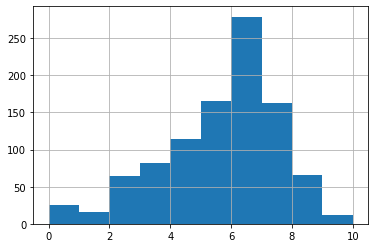

In [62]:
# Greenhouse Gas Score 2008
df_08['greenhouse_gas_score'].hist();

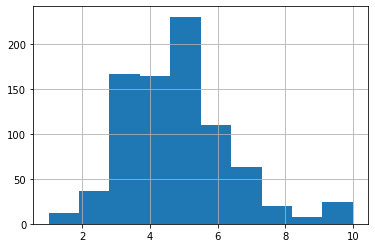

In [63]:
# Greenhouse Gas Score 2018
df_18['greenhouse_gas_score'].hist();

2008 distribution is skewed to the left. The mean is dragged down and is smaller than the median. This could be due to several outliers with smaller greenhouse gas score values.

As for 2018, the distribution looks slightly right skewed. 


### How has the distribution of combined mpg changed from 2008 to 2018?

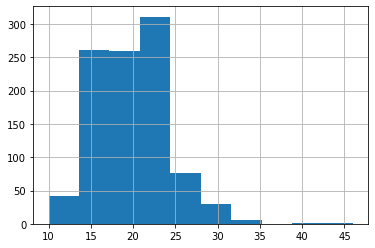

In [64]:
# Combined MPG 2008
df_08['cmb_mpg'].hist();

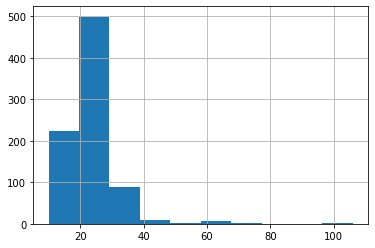

In [65]:
# Combined MPG 2018
df_18['cmb_mpg'].hist();

In 2018, we can see that it is skewed to the right judging by the several huge values or outliers towards the right. 

### Describe the correlation between displacement and combined mpg

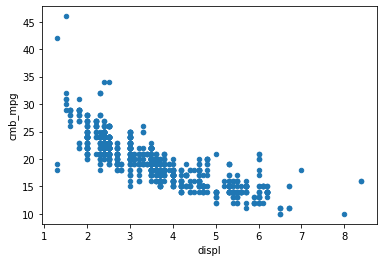

In [66]:
# Displacement and Combined MPG 2008
df_08.plot(x='displ', y='cmb_mpg', kind='scatter');

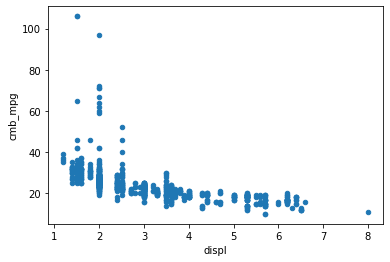

In [67]:
# Displacement and Combined MPG 2018
df_18.plot(x='displ', y='cmb_mpg', kind='scatter');

There is a negative correlation. The _**higher**_ the engine displacement (in liters), the _**lower**_ the combined city/highway fuel economy in miles per gallon.

## Describe the correlation between greenhouse gas score and combined mpg

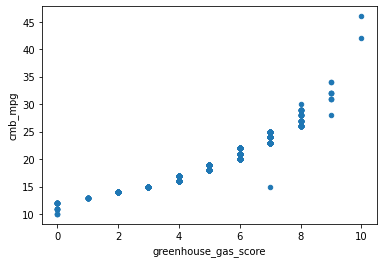

In [68]:
# Greenhouse Gas Score and Combined MPG 2008
df_08.plot(x='greenhouse_gas_score', y='cmb_mpg', kind='scatter');

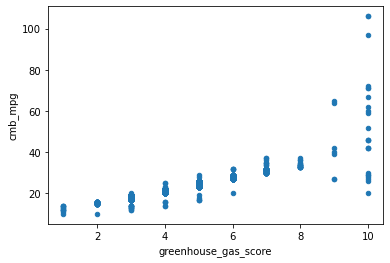

In [69]:
# Greenhouse Gas Score and Combined MPG 2018
df_18.plot(x='greenhouse_gas_score', y='cmb_mpg', kind='scatter');

There is a positive correlation. The _**higher**_ the greenhouse gas score rating, the _**higher**_ the combined city/highway fuel economy in miles per gallon.

***

## Drawing Conclusions


### Q1: Are more unique models using alternative sources of fuel? By how much?

First, let's see how many sources of fuel in our data set.

In [70]:
# Get number of fuel sources counts for 2008
df_08['fuel'].value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [71]:
# Get number of fuel sources counts for 2018
df_18['fuel'].value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 is Ethanol and CNG, and in 2018 is Ethanol and Electricity(based on the [Alternative Fuel Data Centre](https://afdc.energy.gov/fuels/)). 

Next, we run query to filter subsets with alternative sources of fuel only.

In [72]:
# Run query to get alternative fuel subset for 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [73]:
# Run query to get alternative fuel subset for 2018
alt_18 = df_18.query('fuel in ["Ethanol","Electricity"]').model.nunique()
alt_18

26

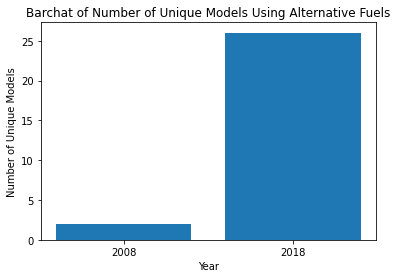

In [74]:
# Plotting bar chart
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Barchat of Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

Since 2018, the number of unique models using alternative sources have increased by 14 to 26. From the bar chart, we can also see that the significantly higher number of unique models using alternative fuels in 2018.

We can also look at the proportions.

In [75]:
# Find the total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [76]:
# Get proportion of alternative fuel against total unique models
prop_08 = alt_08/total_08 * 100
prop_18 = alt_18/total_18 * 100
prop_08, prop_18

(0.5305039787798408, 7.282913165266107)

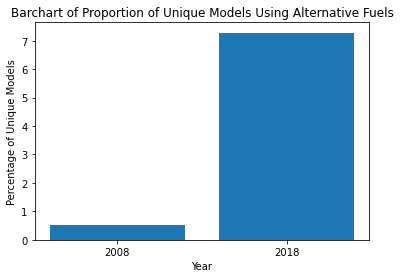

In [77]:
# Plotting bar chart
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Barchart of Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Percentage of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

In [78]:
df_08['veh_class'].value_counts()

small car        333
SUV              280
midsize car      138
pickup            83
station wagon     60
large car         55
van               21
minivan           17
Name: veh_class, dtype: int64

In [79]:
df_18['veh_class'].value_counts()

small car          285
midsize car        138
small SUV          108
large car           88
standard SUV        86
pickup              78
station wagon       34
special purpose     10
minivan              5
Name: veh_class, dtype: int64

In [80]:
veh_class_08 = df_08.groupby('veh_class')['cmb_mpg'].mean()
veh_class_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [81]:
veh_class_18 = df_18.groupby('veh_class')['cmb_mpg'].mean()
veh_class_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [82]:
# Find the variance
variance = veh_class_18 - veh_class_08
variance

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

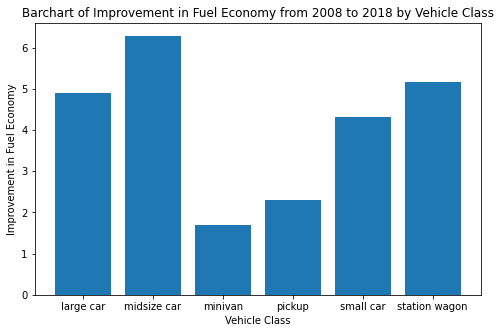

In [83]:
# Plotting bar chart
variance.dropna(inplace=True) # Drop variance with NaN values
plt.subplots(figsize=[8,5])
plt.bar(variance.index, variance)
plt.title("Barchart of Improvement in Fuel Economy from 2008 to 2018 by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Improvement in Fuel Economy");

### Answer

Midsize car, station wagon and large car have the highest improvements in fuel economy at 5.3%, 5.2% and 4.2% - followed by small car, pickup and mini van.

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

Firstly, let's see the characteristics of SmartWay vehicles.

#### What are SmartWay Certified Vehicles?

> Each model year, EPA rates every new car, truck, and Sport Utility Vehicle (SUV) for **greenhouse gas** and **smog-forming emissions (air pollution)** on scales of 1-10. To earn the SmartWay designation, a vehicle must receive a combined score from both scales that is much better than the average vehicle. SmartWay Elite certification is given to only those vehicles that attain the highest scores on both scales. Reference: [https://www.epa.gov/greenvehicles/consider-smartway-vehicle](https://www.epa.gov/greenvehicles/consider-smartway-vehicle)

#### Greenhouse Gas Rating

> This rating reflects vehicle tailpipe emissions that contribute to local and regional air pollution, creating problems such as smog, haze, and health issues. Vehicles that score a 10 are the cleanest. Reference: [https://www.epa.gov/greenvehicles/smog-rating](https://www.epa.gov/greenvehicles/smog-rating)

#### Smog (Air Pollution) Rating

> This rating reflects vehicle tailpipe emissions that contribute to local and regional air pollution, creating problems such as smog, haze, and health issues. Vehicles that score a 10 are the cleanest. Reference: [https://www.epa.gov/greenvehicles/smog-rating](https://www.epa.gov/greenvehicles/smog-rating)

Let's compare the SmartWay Vehicle Threshold for [2008](https://nepis.epa.gov/Exe/ZyPDF.cgi?Dockey=P100FZHT.pdf) and [2018](https://nepis.epa.gov/Exe/ZyPDF.cgi?Dockey=P100TWV5.pdf).

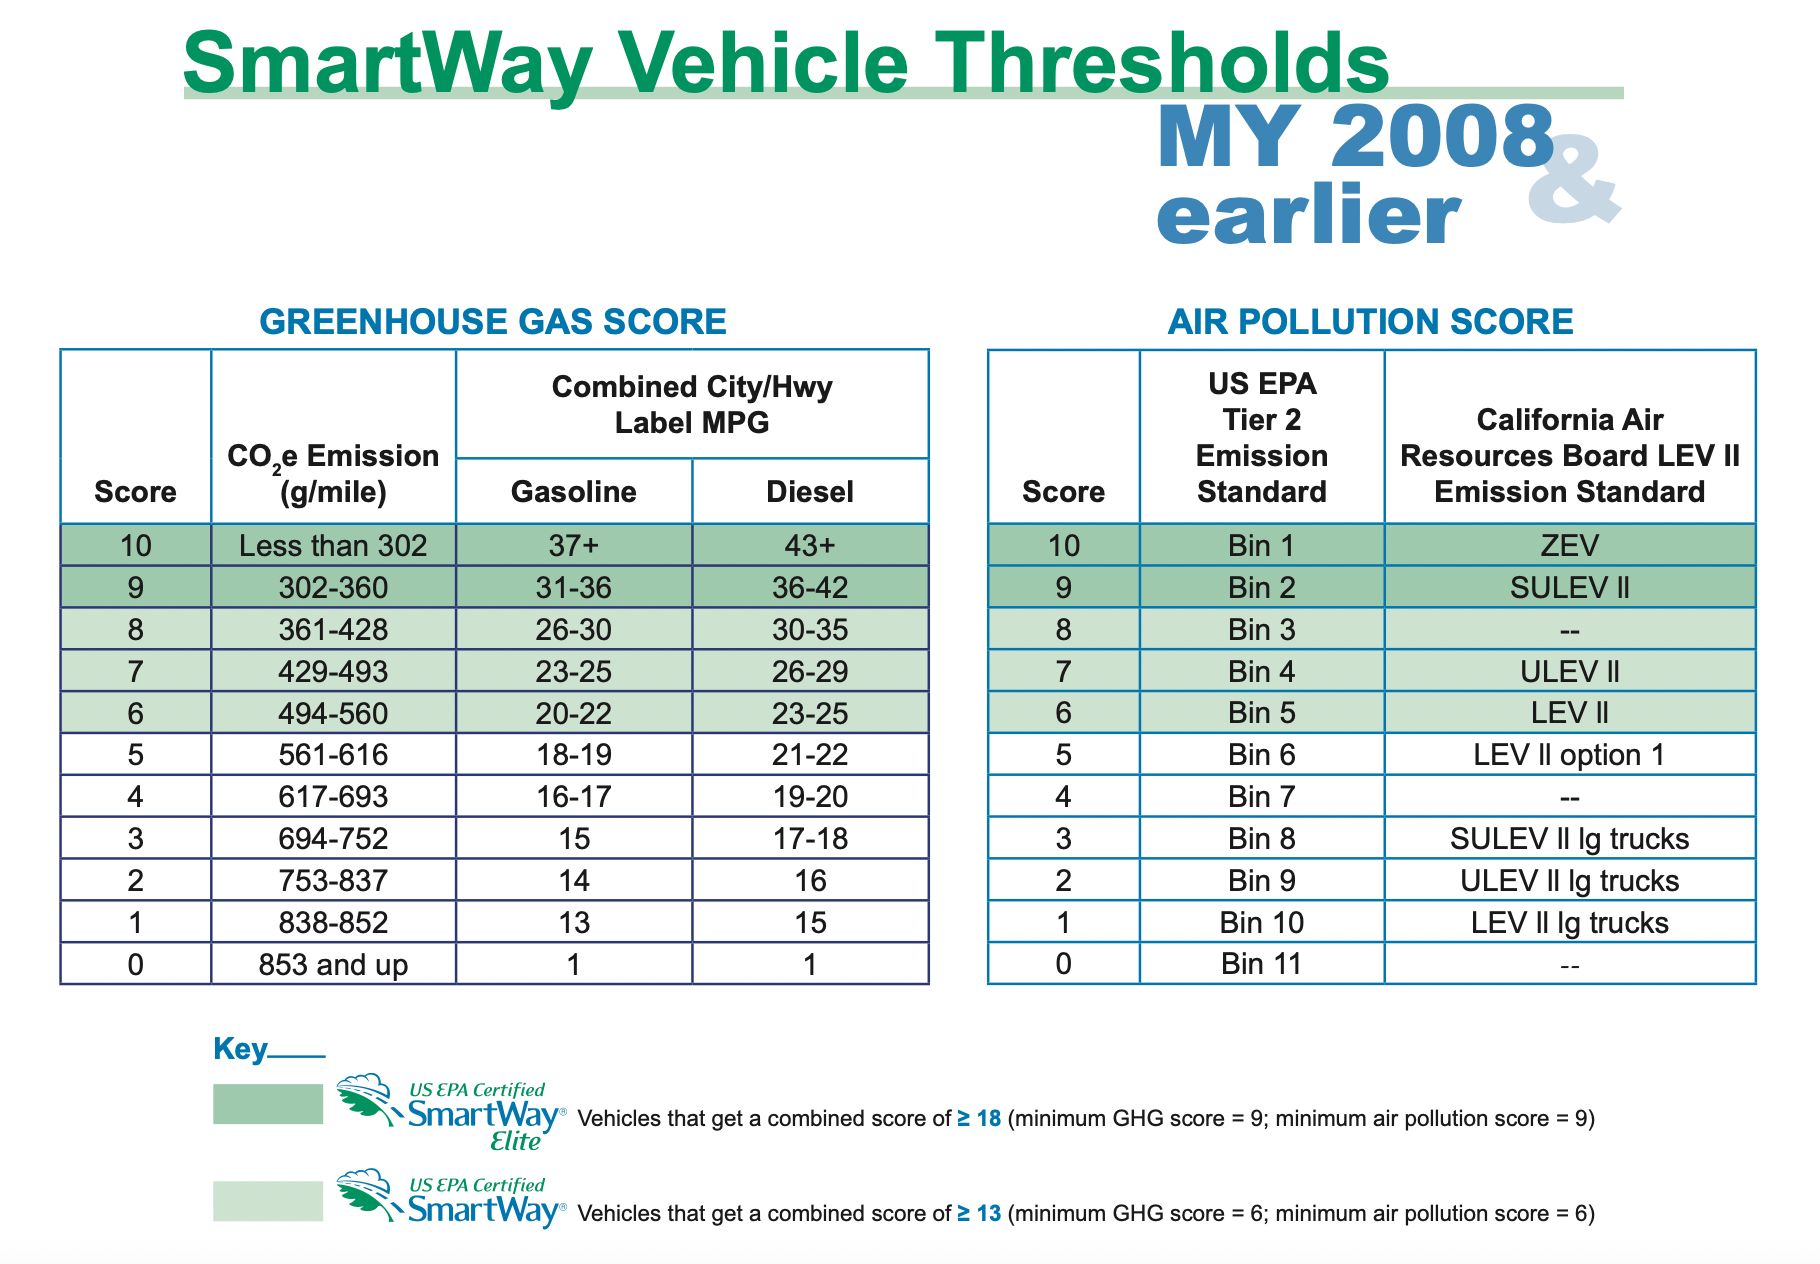

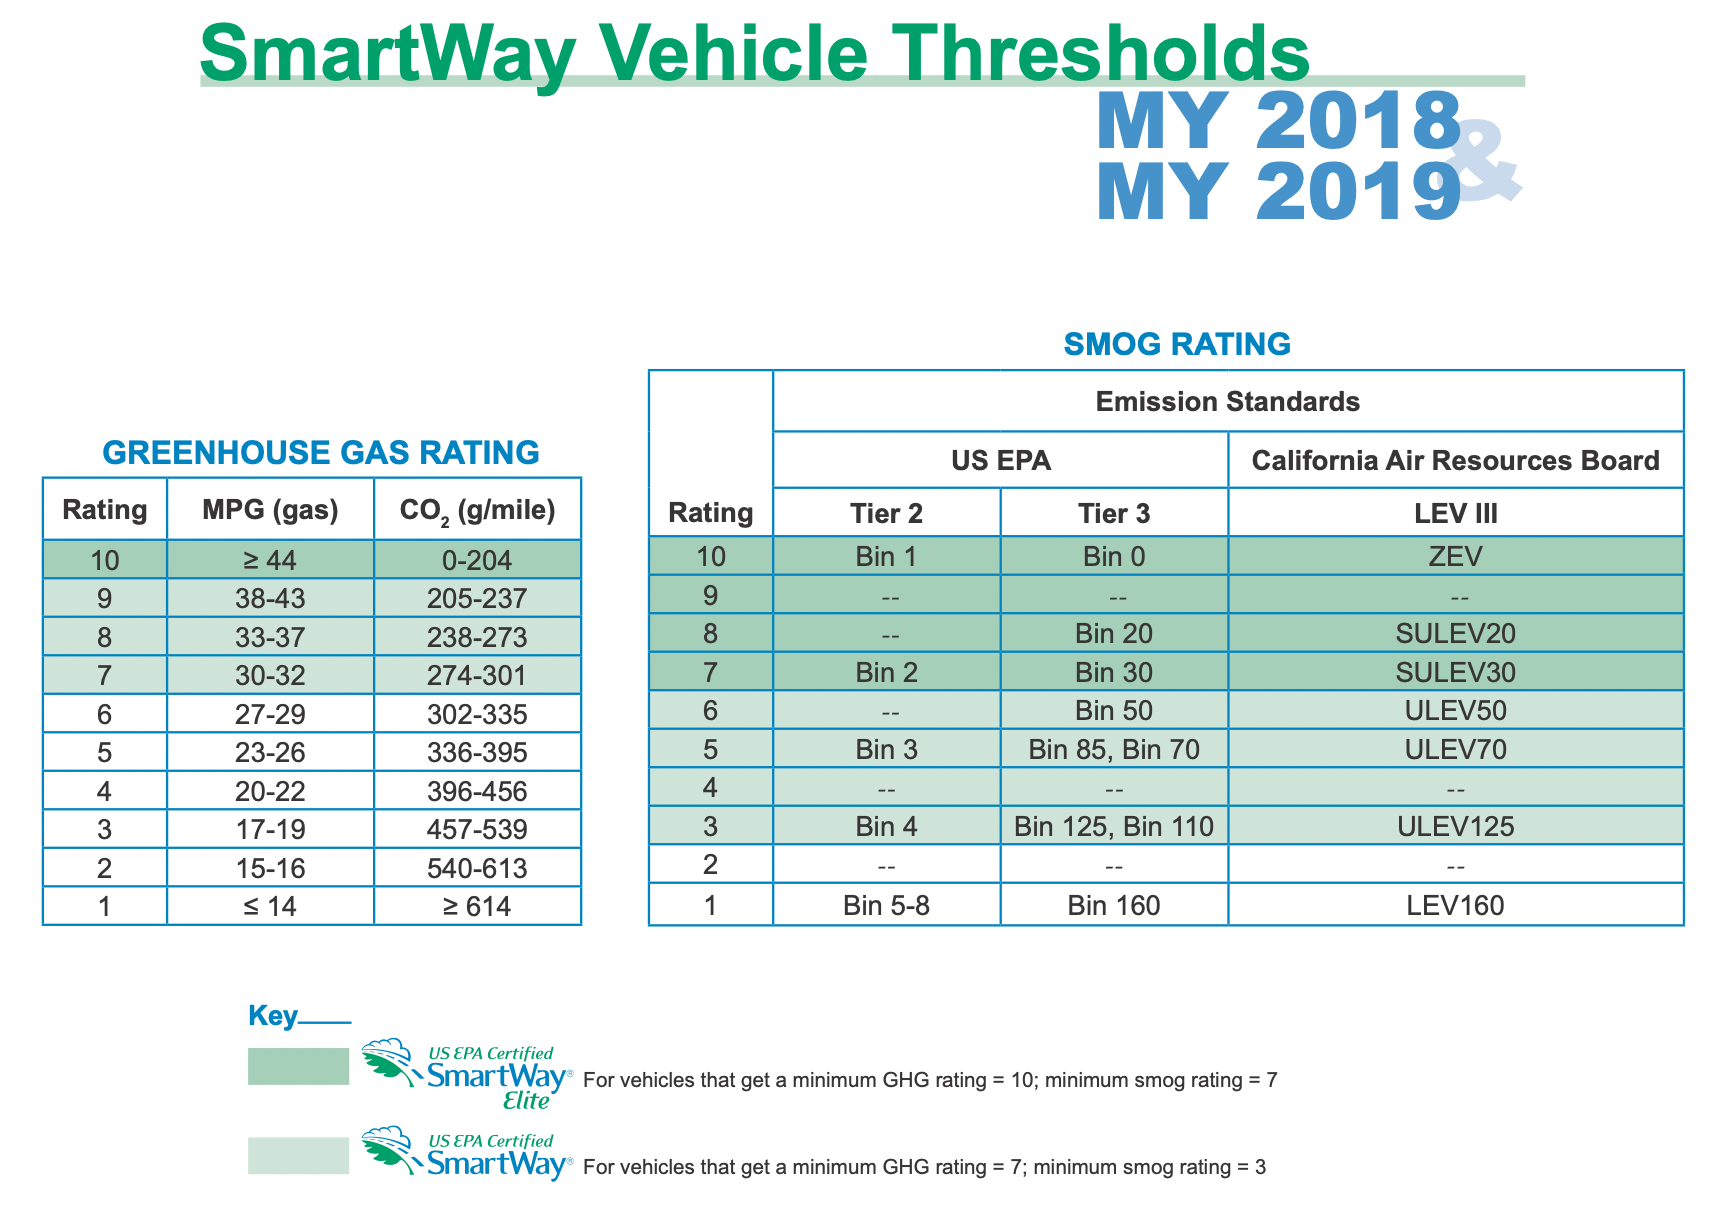

In 2008, vehicles have to get a **combined score of 13 or higher** with minimum greenhouse gas and air pollution ratings of 6 to be certified as SmartWay vehicle.

In 2018, vehicles have to get a **combined score of 10 or higher** with a minimum greenhouse gas rating of 7 and smog rating of 3 to be certified as SmartWay vehicle.

Let us analyse by filtering our data by SmartWay classification.

In [84]:
# Get unique values in SmartWay 2008
df_08['smartway'].unique()

array(['no', 'yes'], dtype=object)

In [85]:
# Filter subset to SmartWay vehicles for 2008
smartway_08 = df_08.query('smartway == "yes"')
smartway_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes
14,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,yes


In [86]:
# Get descriptive statistics for 2008
smartway_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [87]:
# Repeat the same steps for 2018
# Get unique values in SmartWay 2018
df_18['smartway'].unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [88]:
# Filter subset to SmartWay vehicles for 2018
smartway_18 = df_18.query('smartway in ["Yes","Elite"]')
smartway_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
15,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,small car,3.0,27.0,37.0,31.0,7,Yes
120,BUICK Encore,1.4,4,SemiAuto-6,2WD,Gasoline,small SUV,3.0,27.0,33.0,30.0,7,Yes
168,CHEVROLET Cruze,1.4,4,Man-6,2WD,Gasoline,small car,6.0,27.0,40.0,32.0,7,Yes
169,CHEVROLET Cruze,1.4,4,SemiAuto-6,2WD,Gasoline,small car,6.0,29.0,40.0,33.0,8,Yes
170,CHEVROLET Cruze,1.6,4,Auto-9,2WD,Diesel,small car,3.0,31.0,47.0,37.0,7,Yes


In [89]:
# Get descriptive statistics for 2018
smartway_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [90]:
smart_08_count = smartway_08['smartway'].count()
smart_08_count

380

In [91]:
smart_18_count = smartway_18['smartway'].count()
smart_18_count

108

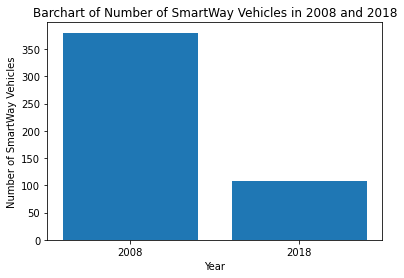

In [92]:
plt.bar(["2008", "2018"], [smart_08_count, smart_18_count])
plt.title("Barchart of Number of SmartWay Vehicles in 2008 and 2018")
plt.xlabel("Year")
plt.ylabel("Number of SmartWay Vehicles");

There are 380 SmartWay vehicles in 2008 (38% of sampled 987 cars) and only 108 SmartWay vehicles in 2018 (13% of sampled 832 cars) - that's at least a 65% reduction in vehicles passing the SmartWay test! Or, is it that the minimum passing threshold has increased in 2018?

Next, we analyse the average greenhouse gas and air pollution scores for both years.

In [93]:
# Find mean for greenhouse gas and air pollution in 2008
smartmean_08 = smartway_08[['greenhouse_gas_score','air_pollution_score']].mean()
smartmean_08

greenhouse_gas_score    6.868421
air_pollution_score     7.365789
dtype: float64

In [94]:
# Find mean for greenhouse gas and air pollution in 2018
smartmean_18 = smartway_18[['greenhouse_gas_score','air_pollution_score']].mean()
smartmean_18

greenhouse_gas_score    7.925926
air_pollution_score     5.212963
dtype: float64

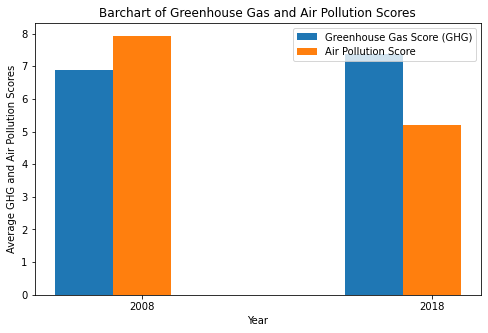

In [95]:
# Plotting barchart
x = np.arange(2)
width = 0.2

plt.subplots(figsize=[8,5])
plt.bar(x-0.2, smartmean_08, width)
plt.bar(x, smartmean_18, width)
plt.title("Barchart of Greenhouse Gas and Air Pollution Scores")
plt.xticks(x, ["2008", "2018"])
plt.xlabel("Year")
plt.ylabel("Average GHG and Air Pollution Scores")
plt.legend(["Greenhouse Gas Score (GHG)", "Air Pollution Score"]);

The average greenhouse gas score has increased from 6.8 to 7.9, but air pollution average score has dropped from 7.4 to 5.2. This seems strange - what does the drop in smog rating means?

In [here](https://www.epa.gov/greenvehicles/smog-rating) it says, 
> Model year 2018 and later: The smog rating chart has been recalibrated to reflect new, more stringent Tier 3 emission standards. This is good news, as Tier 3 cars and trucks are much cleaner. This recalibration makes better use of the entire smog rating scale and allows for more useful comparisons between vehicles. **Please note: Even though ratings appear to be going down, vehicles are not getting dirtier. A MY 2018 and later smog rating of 3 is about the same as a MY 2017 smog rating of 6.**

That's good to know! 

### Q4: What features are associated with better fuel economy?

The features associated with better fuel economy are city fuel economy `city_mpg` and highway fuel economy `hwy_mpg` or, we can instead take a look at the combined city/ highway fuel economy `cmb_mpg` feature.

We interpret "better fuel economy" as cars with an above average combined fuel economy. Hence, we filter data with `cmb_mpg` feature higher than the mean.

In [96]:
cmb_mean_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
cmb_mean_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
6,ACURA TSX,2.4,4,Man-6,2WD,Gasoline,small car,6.0,19.0,28.0,22.0,6,no
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes


Looking at the descriptive statistics of the filtered subset.

In [97]:
cmb_mean_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [98]:
cmb_mean_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
cmb_mean_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
7,ALFA ROMEO 4C,1.8,4,AutoMan-6,2WD,Gasoline,small car,1.0,24.0,34.0,28.0,6,No
9,AUDI A3,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
10,AUDI A3,2.0,4,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
11,AUDI A3 Cabriolet,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,22.0,30.0,25.0,5,No


In [99]:
cmb_mean_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


<AxesSubplot:>

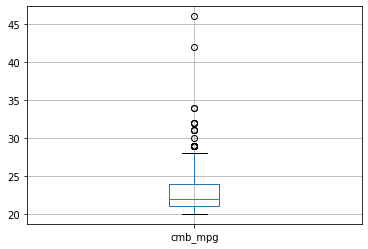

In [100]:
# Plotting boxplot for combined MPG 2008
cmb_mean_08.boxplot(column='cmb_mpg')

2008 boxplot is showing a left skewed distribution with 75% of cars being within the averaged combined MPG score of 24. Several outliers were seen having higher data points.

<AxesSubplot:>

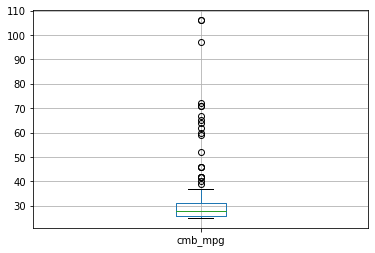

In [101]:
# Plotting boxplot for combined MPG 2018
cmb_mean_18.boxplot(column='cmb_mpg')

2018 boxplot is strewn with outliers - with some outrageously high score at 100 and 110. A high score means the cars is capable of travelling at longer distance with the same amount of fuel. 75% of vehicles fall within the 25 to 30 score.

To answer **Question 5**, we have to perform some merging first!

***

## Merging Datasets

**1. Rename 2008 columns to distinguish from 2018 columns after the merge**

To do this, use pandas' [`rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) with a lambda function. In the lambda function, take the first 10 characters of the column label and and concatenate it with _2008. (Only take the first 10 characters to prevent really long column names.)

The lambda function should look something like this: `lambda x: x[:10] + "_2008"`

In your rename, don't forget to specify the parameter `columns=` when you add the lambda function!

**2. Perform inner merge**

To answer the last question, we are only interested in how the same model of car has been updated and how the new model's mpg compares to the old model's mpg.

Perform an inner [merge](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) with the left on `model_2008` and the right on model. 

### Create combined dataset

In [102]:
# rename 2008 columns
df_08 = df_08.rename(columns = (lambda x: x[:10] + '_2008'))

In [103]:
# view to check names
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [104]:
# merge datasets
df_combined = pd.concat([df_08, df_18], axis=1, join='inner')

In [105]:
# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,...,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,...,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,...,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


***

## Results with Merged Dataset

### Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

#### 1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

To do this, group by `model` and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

In [106]:
model_mpg = df_combined.groupby('model')[['cmb_mpg_2008','cmb_mpg']].mean()

In [107]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,18.0,22.5
ACURA TLX,20.0,25.0
ACURA TLX AWD A-SPEC,21.0,23.0
ACURA TLX FWD A-SPEC,22.0,23.0
ALFA ROMEO 4C,23.0,28.0


In [117]:
model_mpg.shape

(357, 3)

#### 2. Create a new column, `mpg_change`, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [110]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [116]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,18.0,22.5,4.5
ACURA TLX,20.0,25.0,5.0
ACURA TLX AWD A-SPEC,21.0,23.0,2.0
ACURA TLX FWD A-SPEC,22.0,23.0,1.0
ALFA ROMEO 4C,23.0,28.0,5.0


<AxesSubplot:>

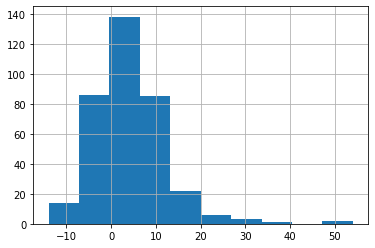

In [114]:
model_mpg['mpg_change'].hist()

#### 3. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [112]:
max_mpg_change = model_mpg['mpg_change'].max()
max_mpg_change

54.0

In [113]:
model_mpg[model_mpg['mpg_change'] == max_mpg_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
CHEVROLET Volt,20.0,74.0,54.0


***

## Conclusion

Let us revisit the questions at the beginning of the analsis.

### Q1: Are more models using alternative sources of fuel? By how much?
As compared to 2008, more models are using alternative sources of fuel in 2018 such as Ethanaol, Gas and Electricity and we measured this - by at least 1200%! (2008: 2 models, 2018: 26 models).

As I'm writing this analysis, there is a whopping of 56 models running on Electricity based on [Wikipedia](https://en.wikipedia.org/wiki/List_of_electric_cars_currently_available). 

### Q2: How much have vehicle classes improved in fuel economy?
Midsize cars, station wagons and large cars have the highest improvements in fuel economy at 5.3%, 5.2% and 4.2% - followed by small car, pickup and mini van.

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?
SmartWay vehicles are vehicles that received a combined score of greenhouse gas and smog rating (air pollution) higher than the average rating.

Based on analysis, 
- At least 65% reduction in vehicles passing the SmartWay test in 2018.
- Average greenhouse gas score has increased from 6.8 to 7.9, but air pollution average score has dropped from 7.4 to 5.2. 
- Further investigation shows that 2018 smog rating of 3 is about the same as a 2017 smog rating of 6 which means a lower score is used, but the quality of the rating remains the same, or have became stricter.

### Q4: What features are associated with better fuel economy?
City and highway MPG or the combined feature, combined MPG is associated with better fuel economy.

There were more vehicles associated with better fuel economy with outliers having scores at ranges of 40 to 110. For context, the average fuel economy score is 30.

### Q5: For all the models that were produced in 2008 that are still produced in 2018, how much has the mpg (miles/gallon) improved and which vehicle improved the most?

There were 357 models that were still produced in 2018 and at least 40%, or 140 vehicles have improvements in MPG averaged at 5%. CHEVROLET Volt model made the highest improvements at 54%!

***

Thank you for reading my analysis!